##  Transfer Learning Using Supervised Pretraining

- Flowers dataset https://www.kaggle.com/datasets/alxmamaev/flowers-recognition


In [5]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamidrezahazaveh","key":"ffcaf69325684c112d615e2bafbc2e4f"}'}

In [6]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [7]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
100% 225M/225M [00:11<00:00, 24.5MB/s]
100% 225M/225M [00:11<00:00, 21.1MB/s]


In [8]:
!unzip flowers-recognition.zip -d flowers

Archive:  flowers-recognition.zip
  inflating: flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/flowers/daisy/10555749515_13a12a026e.jpg

In [9]:
import os
os.listdir('flowers')

['flowers']

In [1]:
!pip install -q lightning-bolts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
! pip install torchmetrics

Importing required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import torch
import pl_bolts
import torchvision
import torchmetrics
import pytorch_lightning as pl

from torch.optim import Adam
from torch.nn.functional import cross_entropy
from torchmetrics.functional import accuracy

from torchvision import models
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader

from pytorch_lightning import Callback
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

/usr/local/lib/python3.11/dist-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/usr/local/lib/python3.11/dist-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/usr/local/lib/python3.11/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.11/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The featu

Point the data_dir to where your flowers dataset is loaded in Google Drive

Original images are not square and all of different sizes

In [11]:
data_dir = 'flowers'

os.listdir(data_dir)

['flowers']

First of all images need to be of same size (resized to 224 x 224) and to be converted to Tensor form and normalized.

- Pre-trained models in Pytorch expect images to be at least 224 x 224 in size
- Images are also normalized using the mean and standard deviation of the Imagenet dataset which comprises of millions of images
- If you know the mean and standard deviation of your own image dataset you can use that to normalize images

In [12]:
basic_transformer = torchvision.transforms.Compose(
    [
     torchvision.transforms.Resize((224, 224)),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(
         mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]
     ),
    ]
)

flower_dataset = ImageFolder(data_dir, transform = basic_transformer)

len(flower_dataset)

4317

In [13]:
flower_dataset.classes

['flowers']

In [14]:
def show_img_example(img, label):
    print('Label: ', flower_dataset.classes[label], "(" + str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

A single Flower image (unaugmented)

Label:  flowers (0)


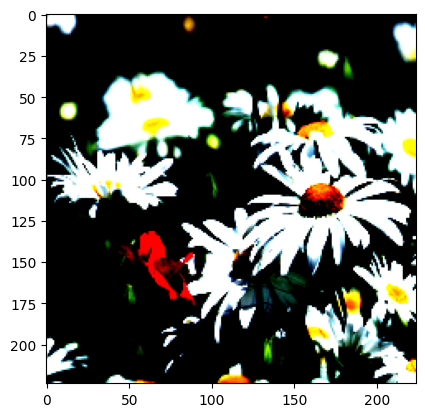

In [15]:
show_img_example(*flower_dataset[5])

Label:  flowers (0)


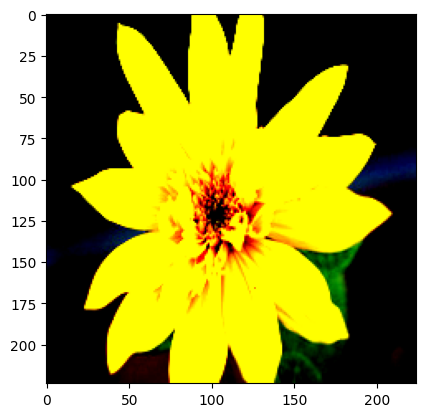

In [16]:
show_img_example(*flower_dataset[3005])

Data module inherited from LightningDataModule:

A collection of a train_dataloaders, val_dataloaders, test_dataloaders along with the matching transforms and data processing/downloads steps required.

To define a DataModule define 5 methods:

1.prepare_data (how to download(), tokenize, etc…) (not implemented in this case)

2.setup (how to split, etc…)

3.train_dataloader

4.val_dataloader(s)

5.test_dataloader(s) (Not implemented in this case)

Agument the data to increase the number of samples used to fine-tune the pre-trained model on our data

Link for reference:

https://pytorch-lightning.readthedocs.io/en/stable/extensions/datamodules.html#what-is-a-datamodule

In [17]:
class FlowerDataModule(pl.LightningDataModule):
    def __init__(self, data_dir =  'flowers'):
        super().__init__()

        self.data_dir = data_dir
        self.transform = transforms.Compose(
          [
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p = 0.5),
            transforms.RandomVerticalFlip(p = 0.1),
            transforms.RandomRotation(10),
              transforms.ToTensor(),
              transforms.Normalize(
                  mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]
              ),
          ]
        )

    def setup(self, stage= None):
        flower_full = ImageFolder(self.data_dir, transform = self.transform)

        length = len(flower_full)

        val_split_size = 0.2

        train_length = round(length * (1 - val_split_size))
        val_length = length - train_length

        self.flower_train, self.flower_val = \
            random_split(flower_full , [train_length, val_length])

    def train_dataloader(self):
        train_dataloader = \
          DataLoader(self.flower_train, batch_size = 32, shuffle = True)

        return train_dataloader

    def val_dataloader(self):
        val_dataloader = \
          DataLoader(self.flower_val, batch_size = 32)

        return val_dataloader


Flower Data module is instantiated and setup is called

In [18]:
flower_dm = FlowerDataModule()

flower_dm.setup()

Training and validation dataloaders are obtained and dimensions are checked. Note that len(dataloader) gives no. of batches as Dataloader loads images in batch form.

In [19]:
train_dl = flower_dm.train_dataloader()

len(train_dl)

108

In [20]:
valid_dl = flower_dm.val_dataloader()

len(valid_dl)

27

In [21]:
len(flower_dm.flower_train) + len(flower_dm.flower_val)

4317

Label:  flowers (0)


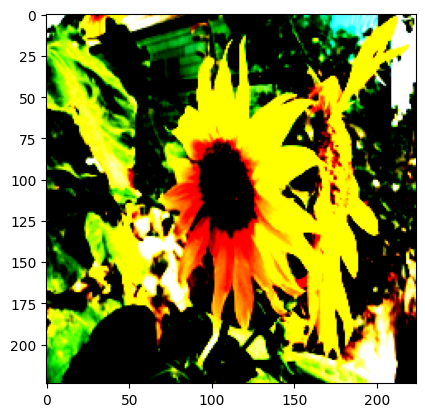

In [22]:
show_img_example(*flower_dm.flower_train[0])

In [23]:
for inp, label in train_dl:
    print('{}:{}'.format(inp, label))
    print('Input shape: ',inp.shape)
    print('Labels shape: ', label.shape)
    break

tensor([[[[-1.5014, -1.5185, -1.5185,  ..., -1.2959, -1.2959, -1.3130],
          [-1.5357, -1.5185, -1.5185,  ..., -1.2959, -1.2959, -1.3130],
          [-1.5357, -1.5357, -1.5357,  ..., -1.2959, -1.2959, -1.2959],
          ...,
          [-1.5870, -1.5870, -1.5870,  ..., -0.8335, -0.9192, -0.9705],
          [-1.5870, -1.5870, -1.5870,  ..., -0.4226, -0.4739, -0.4911],
          [-1.5870, -1.5870, -1.5870,  ..., -0.2856, -0.2856, -0.2513]],

         [[-1.5805, -1.5980, -1.5980,  ..., -1.2654, -1.2654, -1.2829],
          [-1.6155, -1.5980, -1.5980,  ..., -1.2654, -1.2654, -1.2829],
          [-1.6155, -1.6155, -1.6155,  ..., -1.2654, -1.2654, -1.2654],
          ...,
          [-1.6681, -1.6681, -1.6681,  ..., -0.6352, -0.7052, -0.7577],
          [-1.6681, -1.6681, -1.6681,  ..., -0.1099, -0.1625, -0.1800],
          [-1.6681, -1.6681, -1.6681,  ...,  0.0826,  0.0826,  0.1176]],

         [[-1.3687, -1.3861, -1.3861,  ..., -1.0898, -1.0898, -1.1073],
          [-1.4036, -1.3861, -

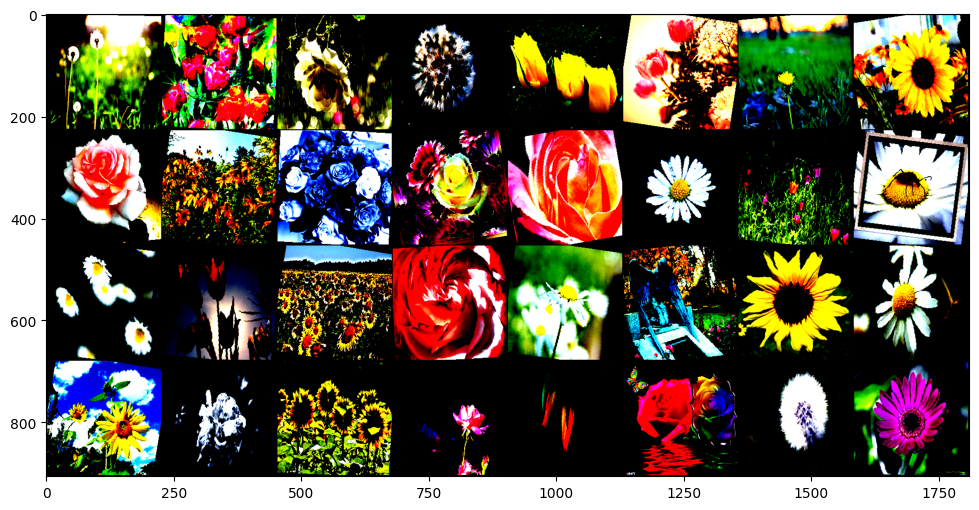

In [24]:
def show_batch_images(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize = (12, 6))
        ax.imshow(make_grid(images, nrow = 8).permute(1, 2, 0))
        break

show_batch_images(train_dl)

One random augmented Individual image is visualised

## Supervised Pretraining

### Fitting only the new finetuning layer

Defining the FlowerImageClassifier using Pytorch lightning.

A LightningModule organizes your PyTorch setup, training, validation etc. code into 5 functions and calls the functions at the right time during the training process.

Computations (init).

Train loop (training_step)

Validation loop (validation_step)

Test loop (test_step)

Optimizers (configure_optimizers).
Hyperparameters are set

Num of classes of flower(num_classes = 5)
Learning rate(lr) = 1e-3

Here we freeze the pretrained model throughout the training process. Only the last layer, the linear classifier is fine-tuned during training.


Links for reference:
https://pytorch-lightning.readthedocs.io/en/stable/common/lightning_module.html

In [25]:
class FlowerImageClassifier(pl.LightningModule):
    def __init__(self, num_classes = 5, lr = 1e-3):
        super().__init__()
        self.save_hyperparameters()

        self.backbone = models.resnet50(pretrained = True)

        self.finetune_layer = torch.nn.Linear(self.backbone.fc.out_features, num_classes)
        self.num_classes = num_classes


    def training_step(self, batch, batch_idx):

        x, y = batch

        with torch.no_grad():
            features = self.backbone(x)

        preds = self.finetune_layer(features)

        loss = cross_entropy(preds, y)
        accuracy_score = accuracy(preds, y, task='multiclass', num_classes=self.num_classes)

        metrics = {'train_loss': loss, 'train_acc': accuracy_score}
        self.log_dict(metrics, on_step = False, on_epoch = True,
                      prog_bar = True, logger = True)

        return loss

    def validation_step(self, batch, batch_idx):

        x, y = batch

        features = self.backbone(x)
        preds = self.finetune_layer(features)

        loss = cross_entropy(preds, y)
        accuracy_score = accuracy(preds, y, task='multiclass',num_classes=self.num_classes)

        metrics = {'valid_loss': loss, 'valid_acc': accuracy_score}
        self.log_dict(metrics, on_step = False, on_epoch = True,
                      prog_bar = True, logger = True)

        return metrics

    def configure_optimizers(self):

        optimizer = Adam(self.parameters(), lr = self.hparams.lr)

        return optimizer

CSV Logger is defined to log the metrics into a csv file

In [26]:
logger = CSVLogger(save_dir = './lightning_logs', name = 'resnet50_bb_frozen')

In [27]:
classifier = FlowerImageClassifier()

trainer = pl.Trainer(max_epochs = 20, logger = logger, gpus = 1)
trainer.fit(classifier, flower_dm)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:32: DeprecationWarning: This property will be removed in 2.0.0. Use `Metric.updated_called` instead.
  return fn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [28]:
# classifier = FlowerImageClassifier()

# trainer = pl.Trainer(max_epochs = 20,
#                      limit_train_batches = 20,
#                      log_every_n_steps = 10,
#                      logger = logger, gpus = 1)

# trainer.fit(classifier, flower_dm)

We can also limit our no. of  train batches examples  using limit_train_batches.Then we need to adjust the log every n steps to some smaller value(as default is 50). It increases the speed of training

Metrics logged in CSV file are now plotted.

In [29]:
metrics = pd.read_csv(f'{trainer.logger.log_dir}/metrics.csv')

metrics.head()

,valid_loss,valid_acc,epoch,step,train_loss,train_acc
0,0.000474,1.0,0,107,NaN,NaN
1,NaN,NaN,0,107,0.048676,0.985814
2,0.000239,1.0,1,215,NaN,NaN
3,NaN,NaN,1,215,0.000393,1.000000
4,0.000184,1.0,2,323,NaN,NaN


The metrics df is cleaned to obtain individual metrics in Pandas series objects form

In [30]:
train_loss = metrics['train_loss'].dropna().reset_index(drop = True)
train_acc = metrics['train_acc'].dropna().reset_index(drop = True)
valid_loss = metrics['valid_loss'].dropna().reset_index(drop = True)
valid_acc = metrics['valid_acc'].dropna().reset_index(drop = True)

Accuracy vs Epoch plot is drawn

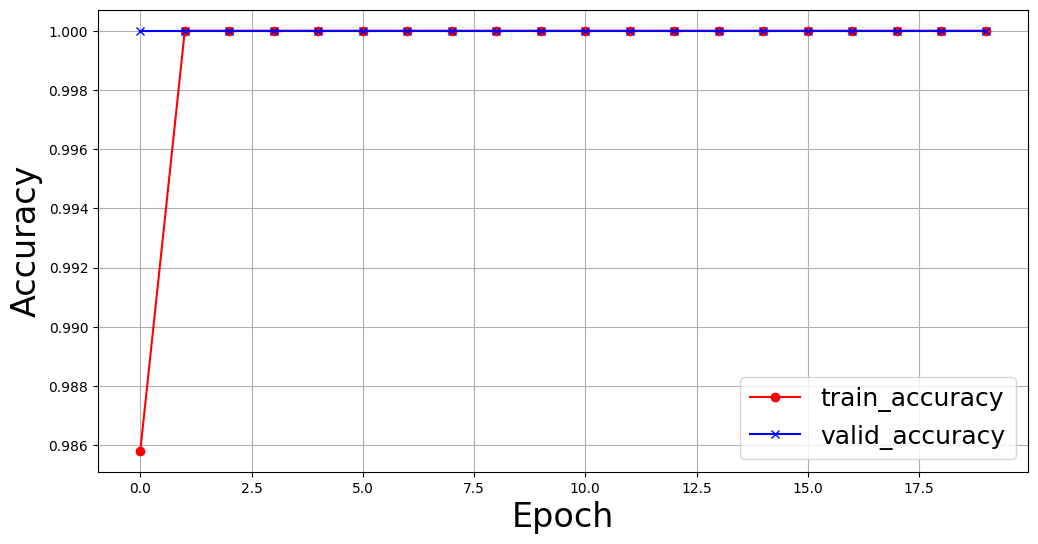

In [31]:
fig = plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(train_acc, color = 'r', marker = 'o', label = 'train_accuracy')
plt.plot(valid_acc, color = 'b', marker = 'x', label = 'valid_accuracy')

plt.ylabel('Accuracy', fontsize = 24)
plt.xlabel('Epoch', fontsize = 24)

plt.legend(loc = 'lower right', fontsize = 18)
plt.savefig(f'{trainer.logger.log_dir}/acc_sup1.png')

Loss vs Epoch plot is shown

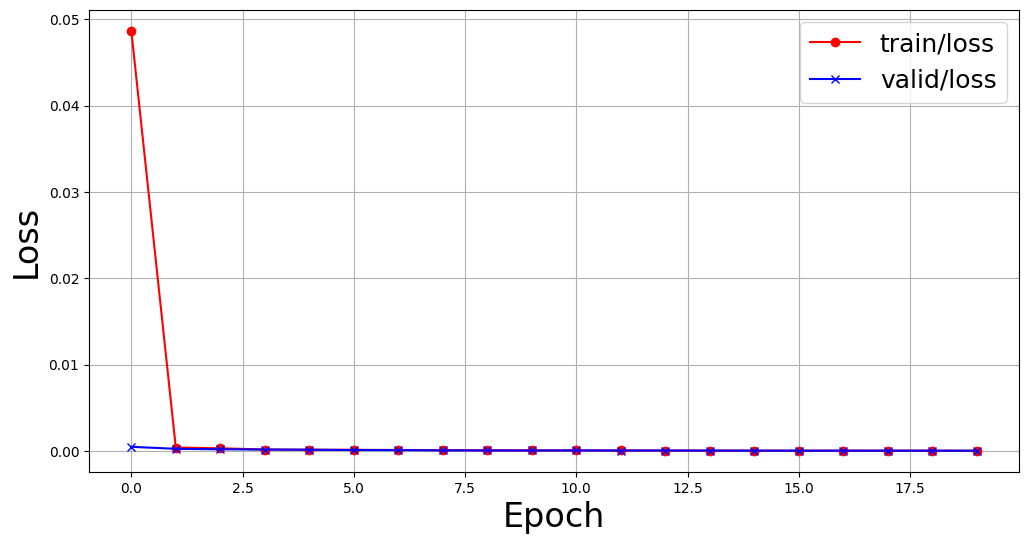

In [32]:
fig = plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(train_loss, color = 'r', marker = 'o', label = 'train/loss')
plt.plot(valid_loss, color = 'b', marker = 'x', label = 'valid/loss')

plt.ylabel('Loss', fontsize = 24)
plt.xlabel('Epoch', fontsize = 24)

plt.legend(loc = 'upper right', fontsize = 18)
plt.savefig(f'{trainer.logger.log_dir}/loss_sup1.png')

Note that here we are unfreezing our backbone after 10 epochs.Model's backbone is frozen for initial 10 epochs.Note that learning rate is 1e-3

In [33]:
class FlowerImageClassifier(pl.LightningModule):
    def __init__(self, num_classes = 5, lr = 1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.num_classes = num_classes
        self.backbone = models.resnet50(pretrained = True)
        self.finetune_layer = torch.nn.Linear(self.backbone.fc.out_features, num_classes)

    def training_step(self, batch, batch_idx):
        x, y = batch
        if self.trainer.current_epoch < 10:
            with torch.no_grad():
                features = self.backbone(x)
        else:
             features = self.backbone(x)

        preds = self.finetune_layer(features)

        loss = cross_entropy(preds, y)
        accuracy_score = accuracy(preds, y, task='multiclass',num_classes=self.num_classes)

        metrics = {'train_loss': loss, 'train_acc': accuracy_score}
        self.log_dict(metrics, on_step = False, on_epoch = True,
                      prog_bar = True, logger = True)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch

        features = self.backbone(x)
        preds = self.finetune_layer(features)

        loss = cross_entropy(preds, y)
        accuracy_score = accuracy(preds, y, task='multiclass',num_classes=self.num_classes)

        metrics = {'valid_loss': loss, 'valid_acc': accuracy_score}
        self.log_dict(metrics, on_step = False, on_epoch = True,
                      prog_bar = True, logger = True)

        return metrics

    def configure_optimizers(self):

        optimizer = Adam(self.parameters(), lr = self.hparams.lr)

        return optimizer

In [34]:
logger = CSVLogger(save_dir = './lightning_logs', name = 'resnet50_bb_unfrozen')

Classifier is called and Trainer is defined and fit with Flower Datamodule.
Training is done for 20 epochs and logger is used for logging metrics.Note that if learning rate is set 1e-4 then spike in loss is not observed while model is unfrozen.Instead it goes down and performance is quite better than when lr is 1e-3.

In [35]:
# classifier = FlowerImageClassifier()

# trainer = pl.Trainer( max_epochs = 20,
#                      logger = logger, gpus = 1)
# trainer.fit(classifier, flower_dm)

In [36]:
classifier = FlowerImageClassifier()

trainer = pl.Trainer( max_epochs = 20, log_every_n_steps = 10,
                     logger = logger, gpus = 1)

trainer.fit(classifier, flower_dm)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: Tr

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:32: DeprecationWarning: This property will be removed in 2.0.0. Use `Metric.updated_called` instead.
  return fn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Metrics logged in CSV file are now plotted.

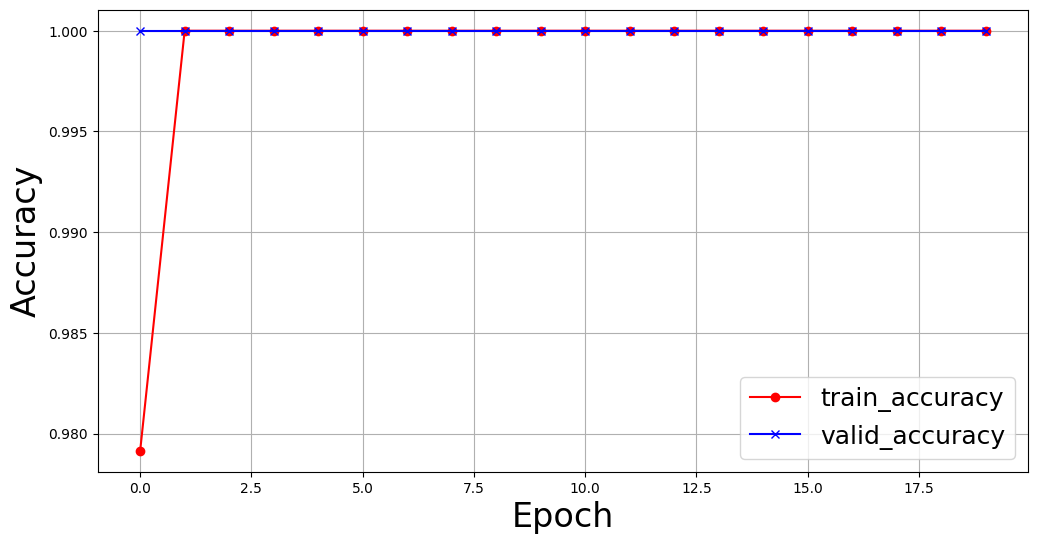

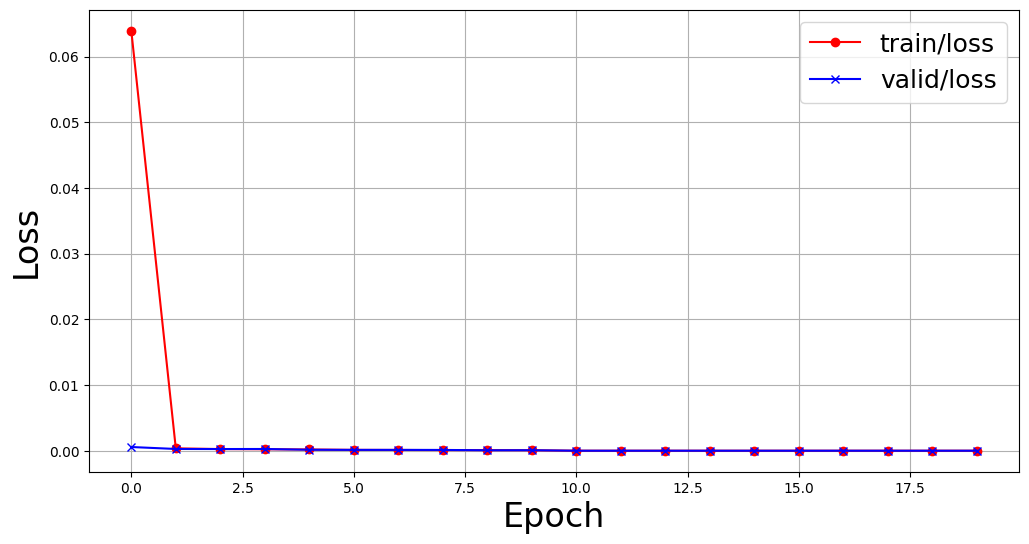

In [37]:
metrics = pd.read_csv(f'{trainer.logger.log_dir}/metrics.csv')

train_loss = metrics['train_loss'].dropna().reset_index(drop = True)
train_acc = metrics['train_acc'].dropna().reset_index(drop = True)
valid_loss = metrics['valid_loss'].dropna().reset_index(drop = True)
valid_acc = metrics['valid_acc'].dropna().reset_index(drop = True)

fig = plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(train_acc, color = 'r', marker = 'o', label = 'train_accuracy')
plt.plot(valid_acc, color = 'b', marker = 'x', label = 'valid_accuracy')

plt.ylabel('Accuracy', fontsize = 24)
plt.xlabel('Epoch', fontsize = 24)

plt.legend(loc = 'lower right', fontsize = 18)
plt.savefig(f'{trainer.logger.log_dir}/acc_sup2.png')

train_loss = metrics['train_loss'].dropna().reset_index(drop = True)
valid_loss = metrics['valid_loss'].dropna().reset_index(drop = True)

fig = plt.figure(figsize = (12, 6))
plt.grid(True)

plt.plot(train_loss, color = 'r', marker = 'o', label = 'train/loss')
plt.plot(valid_loss, color = 'b', marker = 'x', label = 'valid/loss')

plt.ylabel('Loss', fontsize = 24)
plt.xlabel('Epoch', fontsize = 24)

plt.legend(loc = 'upper right', fontsize = 18)
plt.savefig(f'{trainer.logger.log_dir}/loss_sup2.png')

![](img/20201117-1-train_acc.svg "Train Accuracy")

![](img/20201117-1-train_loss.svg "Train Loss")